#Group 5

# **Predicting Happiness Index from Digital and Lifestyle Habits Using Machine Learning**
This project investigates how digital habits (e.g., screen time and social media usage) and lifestyle behaviors (e.g., sleep quality, exercise frequency, and stress levels) influence mental health and emotional balance. Using happiness as a measurable indicator of mental wellness, we aim to build a machine learning model that predicts a user’s happiness score based on these independent factors. The goal is to understand behavioral patterns and provide data-driven insights that can support healthier digital and lifestyle choices.”

#1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# 2.Load the data set

In [2]:

df = pd.read_csv('/content/Mental_Health_and_Social_Media_Balance_Dataset.csv',
                 encoding='latin1')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [4]:
df.shape

(500, 10)

In [5]:
#show the unique values in the data set
df.nunique()

,0
User_ID,500
Age,34
Gender,3
Daily_Screen_Time(hrs),82
Sleep_Quality(1-10),9
Stress_Level(1-10),9
Days_Without_Social_Media,9
Exercise_Frequency(week),8
Social_Media_Platform,6
Happiness_Index(1-10),7


In [6]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [7]:
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Daily_Screen_Time(hrs),0
Sleep_Quality(1-10),0
Stress_Level(1-10),0
Days_Without_Social_Media,0
Exercise_Frequency(week),0
Social_Media_Platform,0
Happiness_Index(1-10),0


There are no null values in the data
---



In [8]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicate entries

In [9]:
print("Features in the DataFrame => {}".format(df.columns.ravel()))

Features in the DataFrame => Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')


The data set has 10 columns with 9 independant variables and one dependant one which is the Happiness_index that we are trying to predict

#3.Exploratory Data Analysis

In [10]:
df.columns


Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

explore each column of the dataset

Age

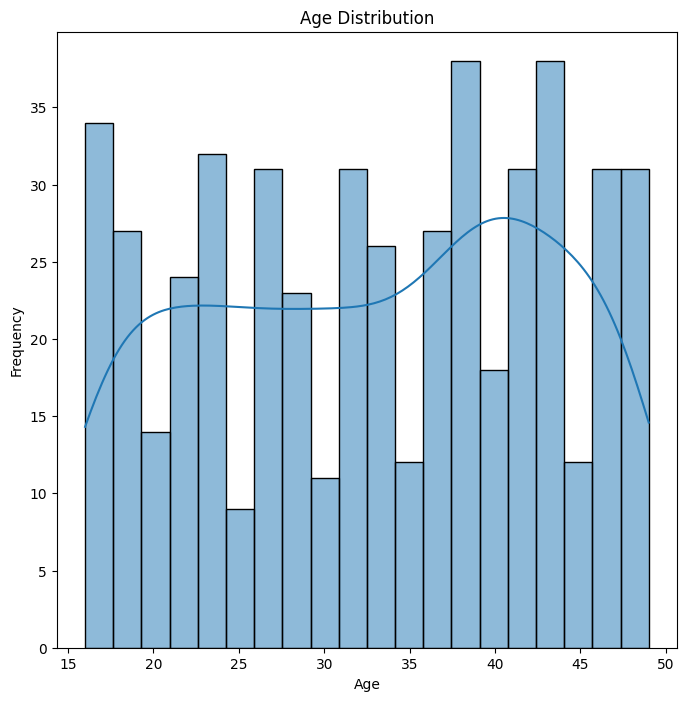

In [11]:
# explore the age distribution with histplot
plt.figure(figsize=(8,8))
sns.histplot(x='Age',data=df,bins=20,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()



Gender

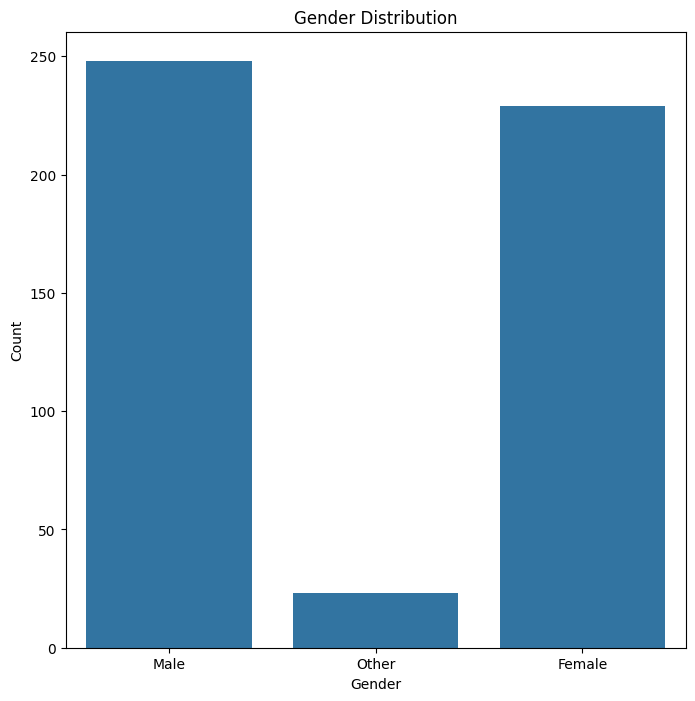

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


Daily screen time


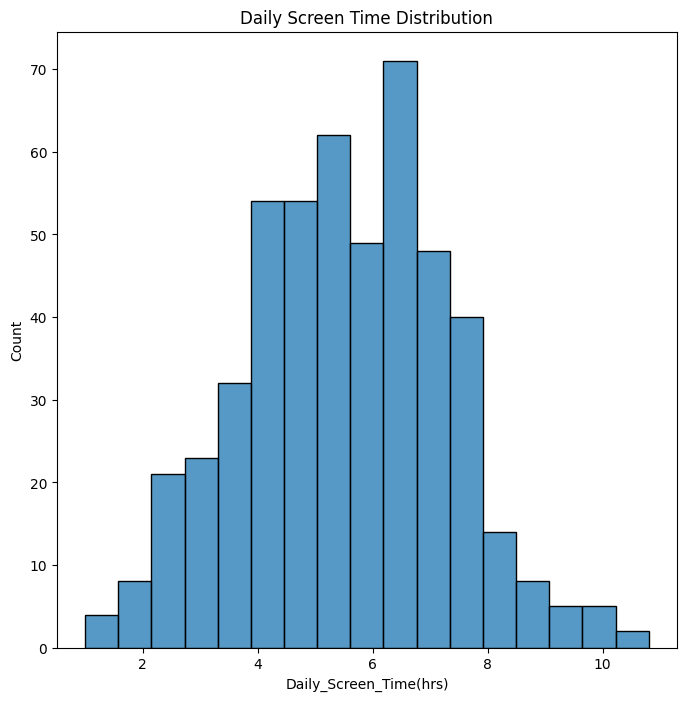

In [13]:
plt.figure(figsize=(8,8))
sns.histplot(x='Daily_Screen_Time(hrs)',data=df)
plt.title('Daily Screen Time Distribution')
plt.show()

alot of people have a screen tim of between 4 and 8 hours

sleep quality

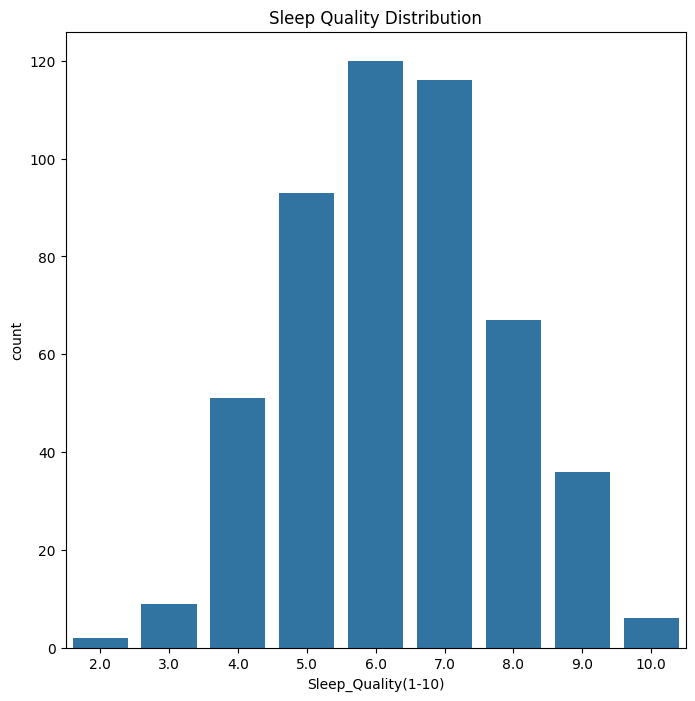

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sleep_Quality(1-10)',data=df)
plt.title('Sleep Quality Distribution')
plt.show()

Correlation between Happiness and sleep_Quality: 0.68


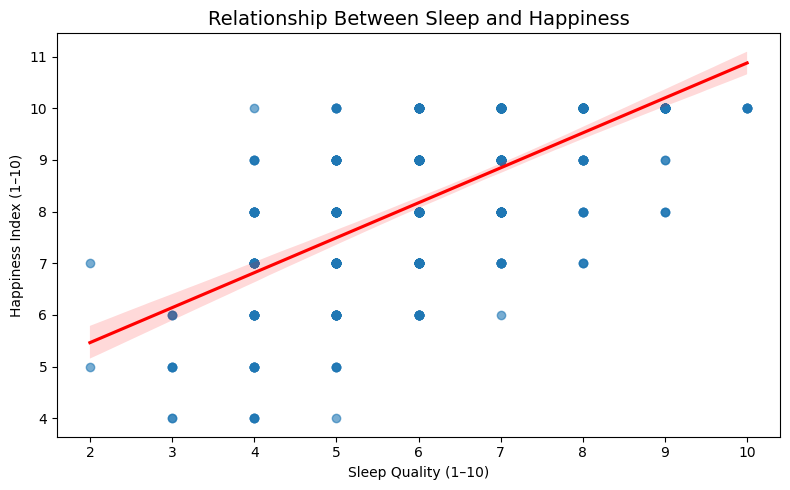

In [15]:
#correlation between sleep Quality and  happiness
correlation = df['Happiness_Index(1-10)'].corr(df['Sleep_Quality(1-10)'])
print(f"Correlation between Happiness and sleep_Quality: {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='Sleep_Quality(1-10)',
    y='Happiness_Index(1-10)',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Relationship Between Sleep and Happiness', fontsize=14)
plt.xlabel('Sleep Quality (1–10)')
plt.ylabel('Happiness Index (1–10)')
plt.tight_layout()
plt.show()

This shows a strong positive relationship between sleep quality and happiness here the better the sleep quality of an individual , the better their happiness score

stress level

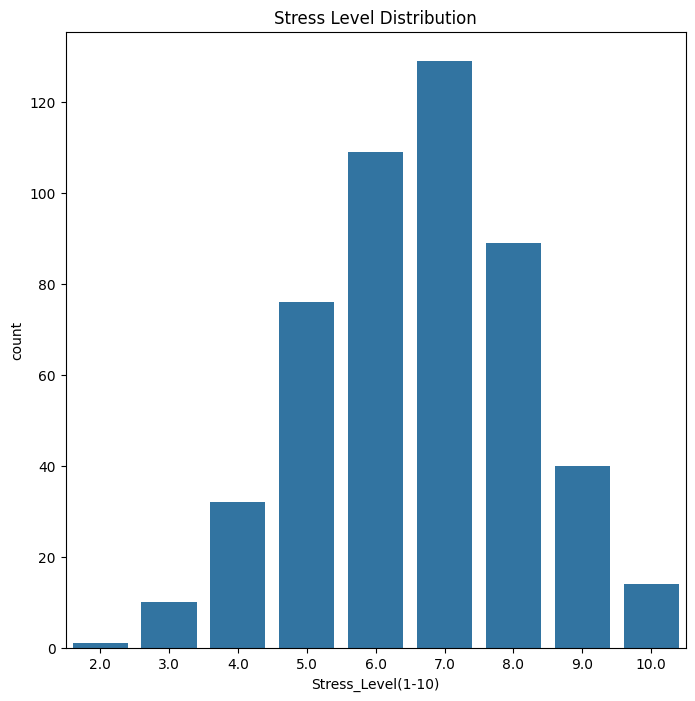

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x='Stress_Level(1-10)',data=df)
plt.title('Stress Level Distribution')
plt.show()

Alot of people have a stress level of between 5 and 8 which is concerning

Correlation between Happiness and Stress: -0.74


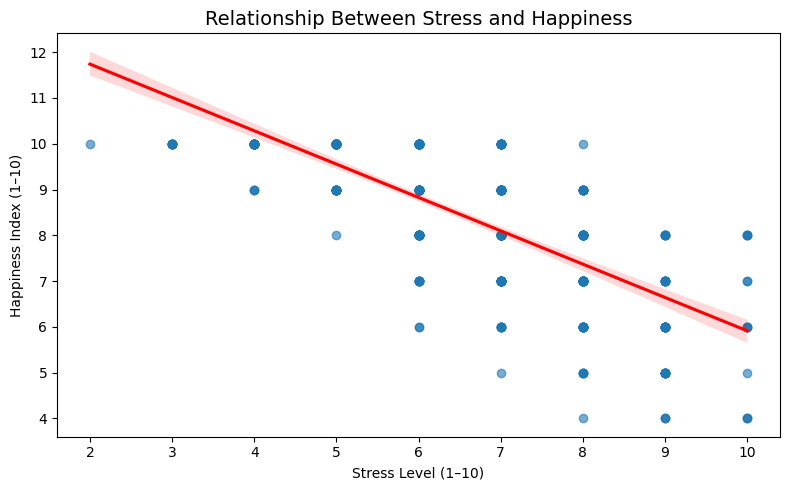

In [17]:
#correlation between stress and Happiness
correlation = df['Happiness_Index(1-10)'].corr(df['Stress_Level(1-10)'])
print(f"Correlation between Happiness and Stress: {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='Stress_Level(1-10)',
    y='Happiness_Index(1-10)',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Relationship Between Stress and Happiness', fontsize=14)
plt.xlabel('Stress Level (1–10)')
plt.ylabel('Happiness Index (1–10)')
plt.tight_layout()
plt.show()

we can see that there is a strong negative correlation  between happiness and stress levels. Those with a higher happiness rating also rate lower stress levels.

Days without social media

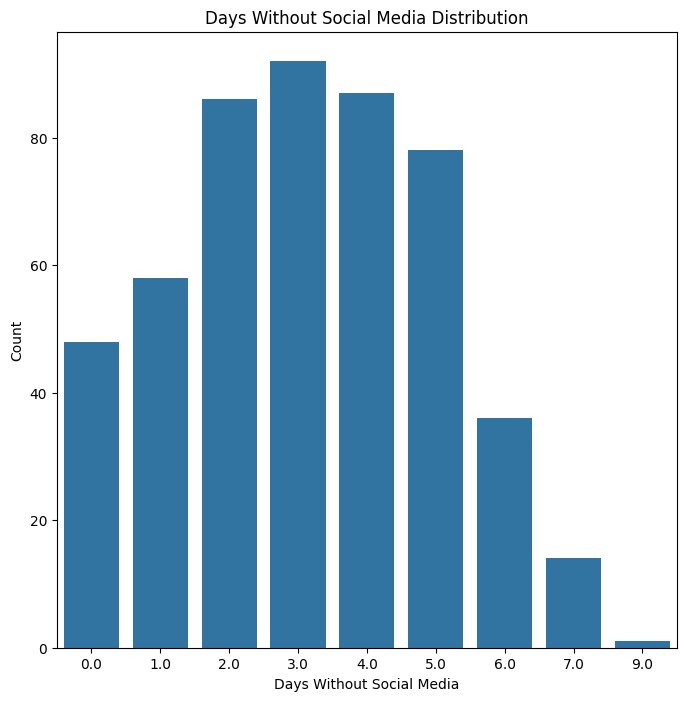

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(x='Days_Without_Social_Media',data=df)
plt.xlabel('Days Without Social Media')
plt.ylabel('Count')
plt.title('Days Without Social Media Distribution')
plt.show()

Most people can handle a short break (2–5 days) .

Long breaks (a week or more) are much less common.

Almost nobody reached 9 days without social media.

Exercise frequency

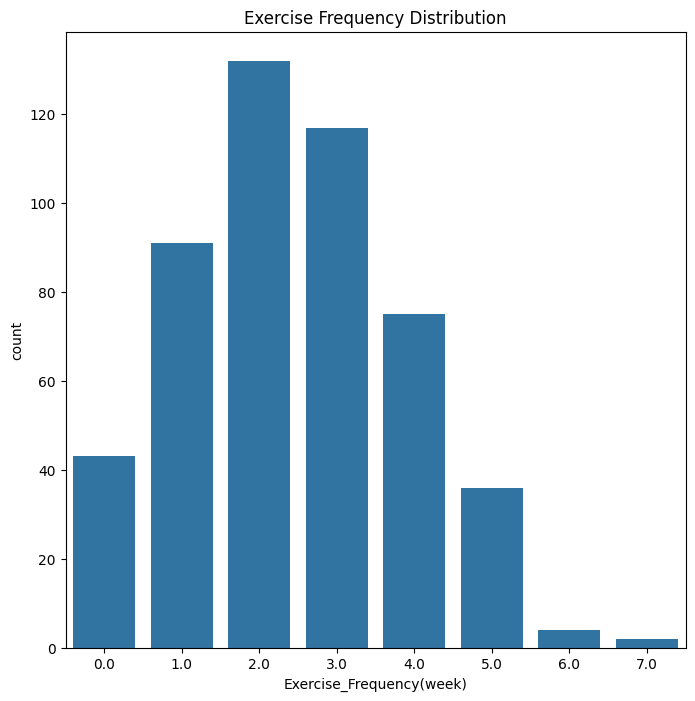

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exercise_Frequency(week)',data=df)
plt.title('Exercise Frequency Distribution')
plt.show()

Social media platform

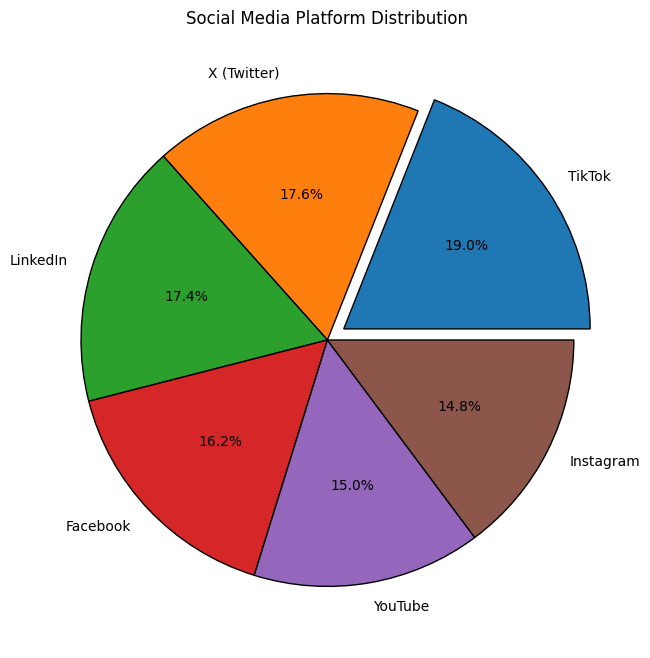

In [20]:
Platform = df['Social_Media_Platform'].value_counts()

Labels = ['TikTok','X (Twitter)','LinkedIn','Facebook','YouTube','Instagram']

plt.figure(figsize=(8,8))
plt.pie(Platform,autopct='%1.1f%%',labels=Labels,explode=(0.08,0,0,0,0,0),wedgeprops={'edgecolor':"black"})
plt.title('Social Media Platform Distribution')
plt.show()


tiktok is the most used social media app followed by twitter

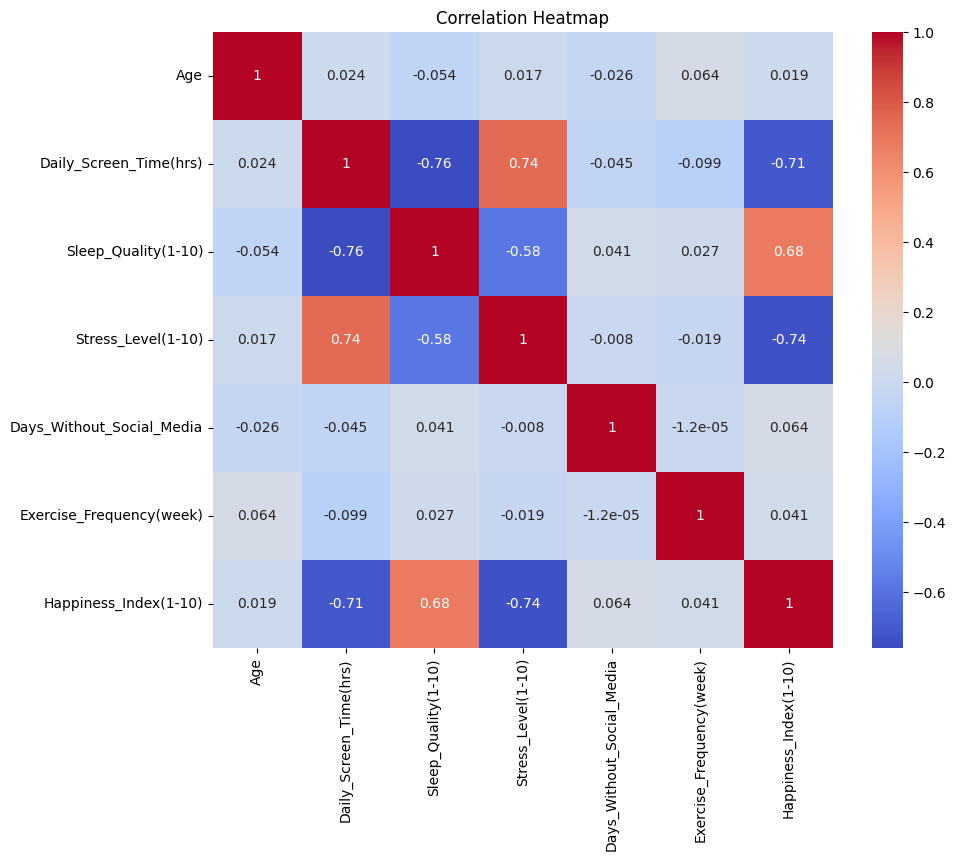

In [21]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**From the Correlation Heat map we can see that:**



*   Higher stress levels bring about lower happiness since the relationship is strongly negative(-0.74)
*   Higher screen time leads to lower happiness


*   Better sleep = higher happiness
*   Very weak relationship between age and happiness

*   Very weak relationship between exercise frequency and happiness almost no effect.(0.041)

*   Very weak positive relationship between days without social media and happiness









## ***Stress level, screen time, and sleep quality are the most important predictors of happiness.***




# 4.Data preprocessing

1. Dataset Shape

The dataset has:

500 rows

10 columns

This is a good-sized dataset for machine learning.

2. Data Types

The dataset contains:

Categorical

User_ID

Gender

Social_Media_Platform

Numerical

Age

Daily_Screen_Time(hrs)

Sleep_Quality(1-10)

Stress_Level(1-10)

Days_Without_Social_Media

Exercise_Frequency(week)

Happiness_Index(1-10)

This mix is perfect for classification or regression.

3. Missing Values

The dataset reports:

0 missing values in all columns


This is rare — but it means we don’t need imputation.

4. Statistical Summary

Some important findings:

Daily Screen Time

Mean ≈ 5.0 hours/day

Min = 1h, Max = 10h

Screen time is fairly high on average → expected to correlate with stress levels.

Sleep Quality

Mean ≈ 6.4 / 10

Quite low — may show impact of excessive screen use.

Stress Level

Mean ≈ 7.1

Indicates generally stressed population.

Happiness Index

Mean ≈ 8.37

High happiness score despite stress → interesting for analysis.

Most used platform

TikTok is the top platform (95 users)

Could show higher engagement or addiction patterns.

1. Encoding Categorical Variables
Gender Encoding

Converted using LabelEncoder:

Gender	Encoded
Male	1
Female	0
Other	2

Social Media Platform (One-Hot Encoding)

Created new columns:

Platform_Facebook

Platform_Instagram

Platform_LinkedIn

Platform_TikTok

Platform_X (Twitter)

Platform_YouTube

Machine learning models can now properly interpret platform usage.

2. Feature Engineering
Screen Time Category (New Categorical Feature)

Based on daily screen hours:

Hours	Category
0–3	Low
3–6	Medium
6+	High

This improves interpretability of how “high usage” affects mental health.

In [22]:
df.columns.tolist()


['User_ID',
 'Age',
 'Gender',
 'Daily_Screen_Time(hrs)',
 'Sleep_Quality(1-10)',
 'Stress_Level(1-10)',
 'Days_Without_Social_Media',
 'Exercise_Frequency(week)',
 'Social_Media_Platform',
 'Happiness_Index(1-10)']

In [23]:
df['Dependency_Score'] = (
    df['Daily_Screen_Time(hrs)'] * df['Stress_Level(1-10)']
) / (df['Days_Without_Social_Media'] + 1)



This feature captures:

addiction-like behavior

emotional reliance on social media

stress response combined with usage

Huge benefit for predicting mental health impact.

3. Scaling Numerical Features

All numerical features were normalized using MinMaxScaler (0 to 1):

Scaled columns include:

Age

Screen Time

Sleep Quality

Stress Level

Days Without Social Media

Exercise Frequency

Happiness Index

Dependency Score

Scaling ensures all features contribute equally to the ML model especially important for SVM, NN, and KNN.

4. Output Dataset Structure

The dataset includes:

Original Features
Encoded Features
Feature Engineered Columns
Scaled Values

--- 1. Data Loading and Initial Inspection (Mental_Health_and_Social_Media_Balance_Dataset.csv) ---
Dataset loaded successfully.

First 5 rows of the dataset:
  User_ID  Age  Gender  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  \
0    U001   44    Male                     3.1                  7.0   
1    U002   30   Other                     5.1                  7.0   
2    U003   23   Other                     7.4                  6.0   
3    U004   36  Female                     5.7                  7.0   
4    U005   34  Female                     7.0                  4.0   

   Stress_Level(1-10)  Days_Without_Social_Media  Exercise_Frequency(week)  \
0                 6.0                        2.0                       5.0   
1                 8.0                        5.0                       3.0   
2                 7.0                        1.0                       3.0   
3                 8.0                        1.0                       1.0   
4                 7.0   

/tmp/ipython-input-275026928.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-275026928.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

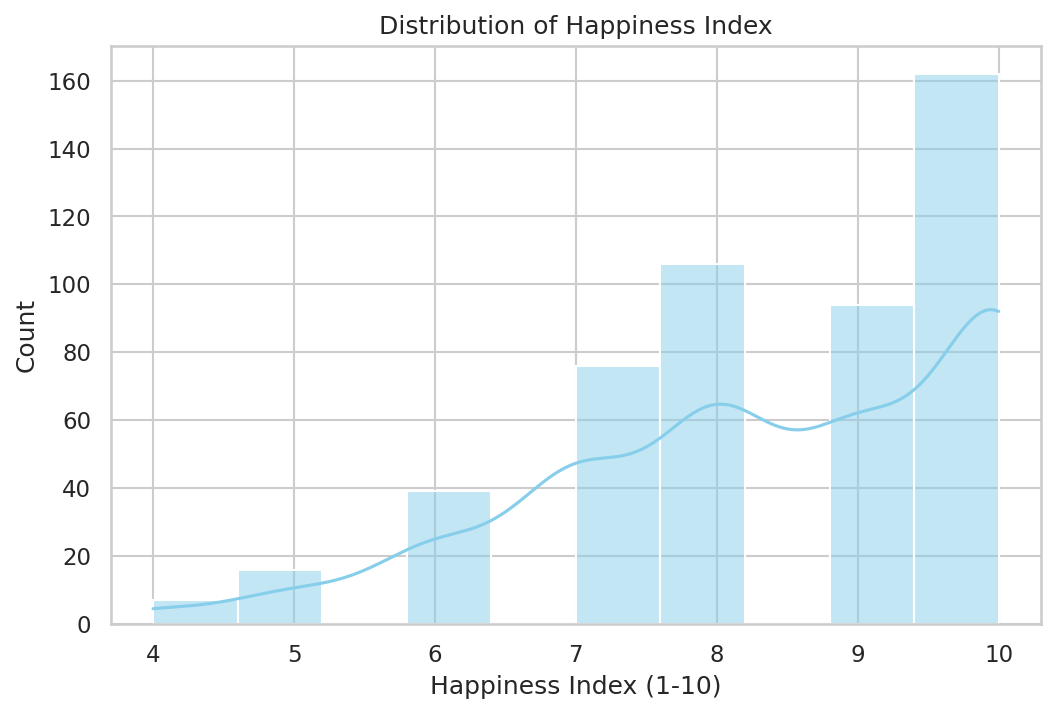

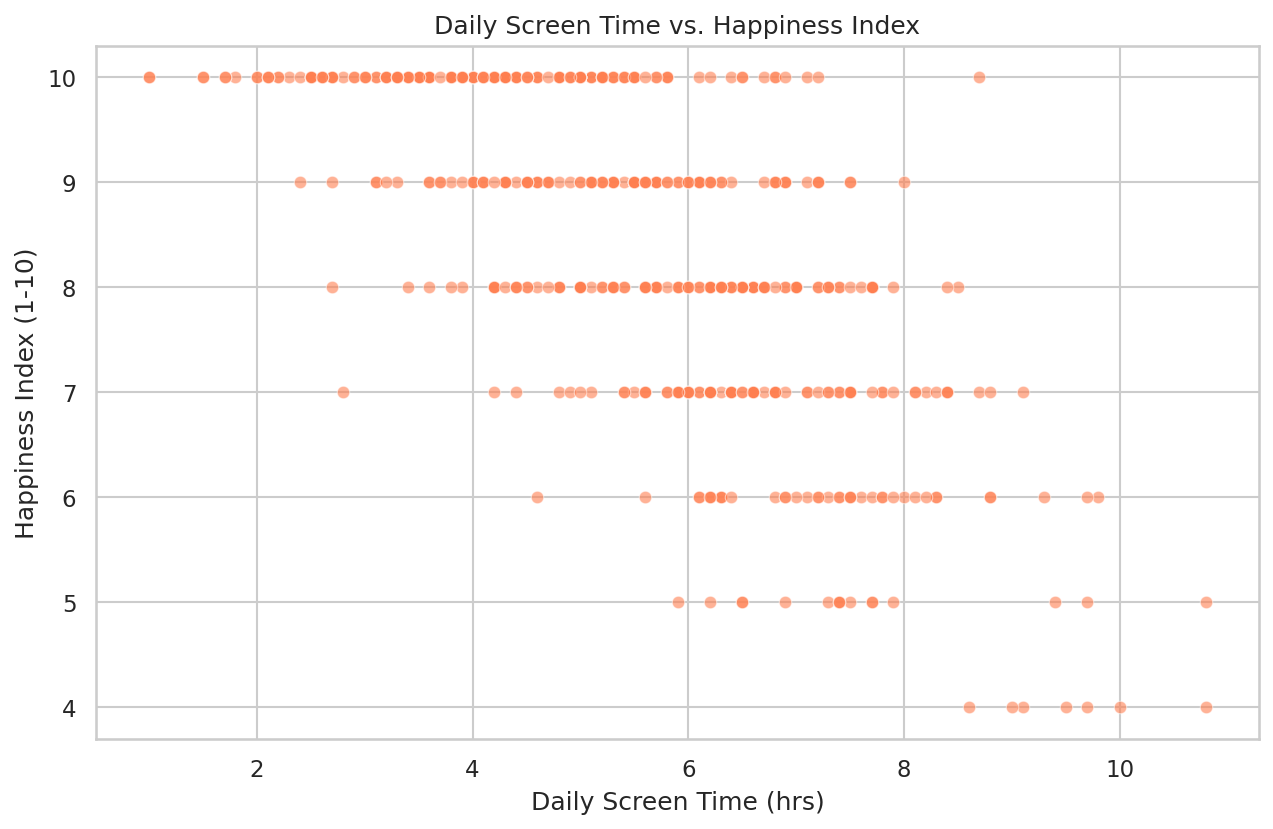

/tmp/ipython-input-275026928.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level(1-10)', y='Sleep_Quality(1-10)', data=df, palette='viridis')


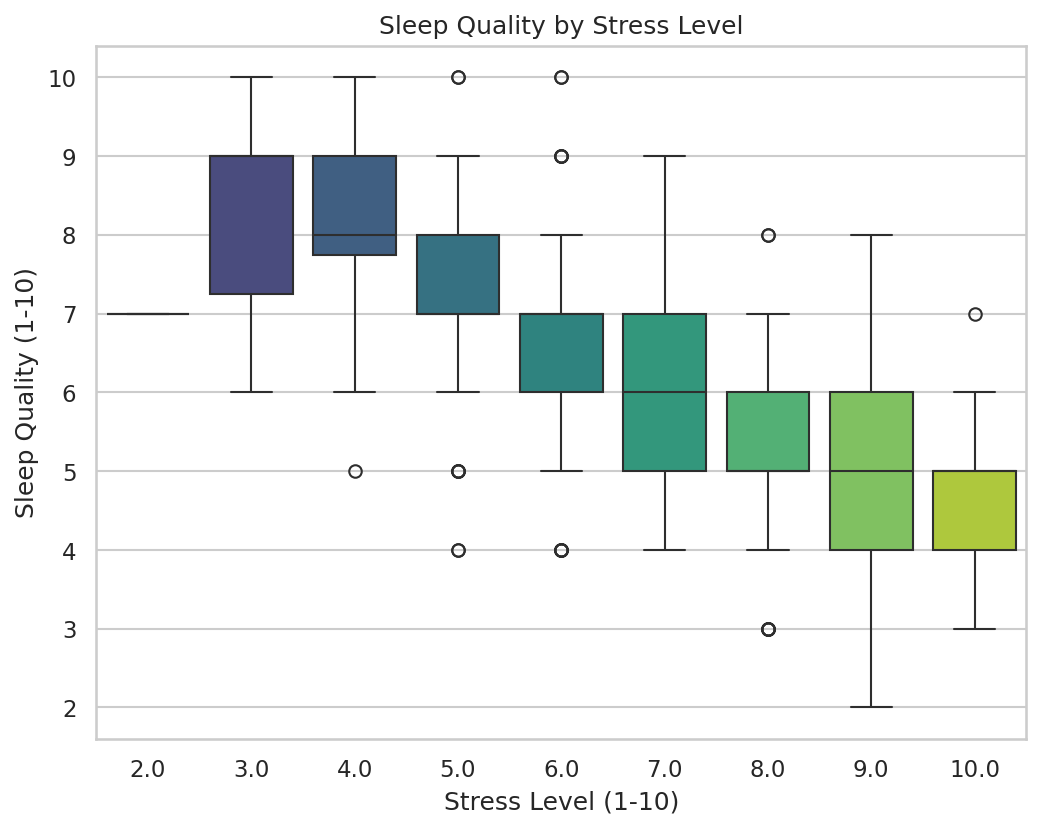

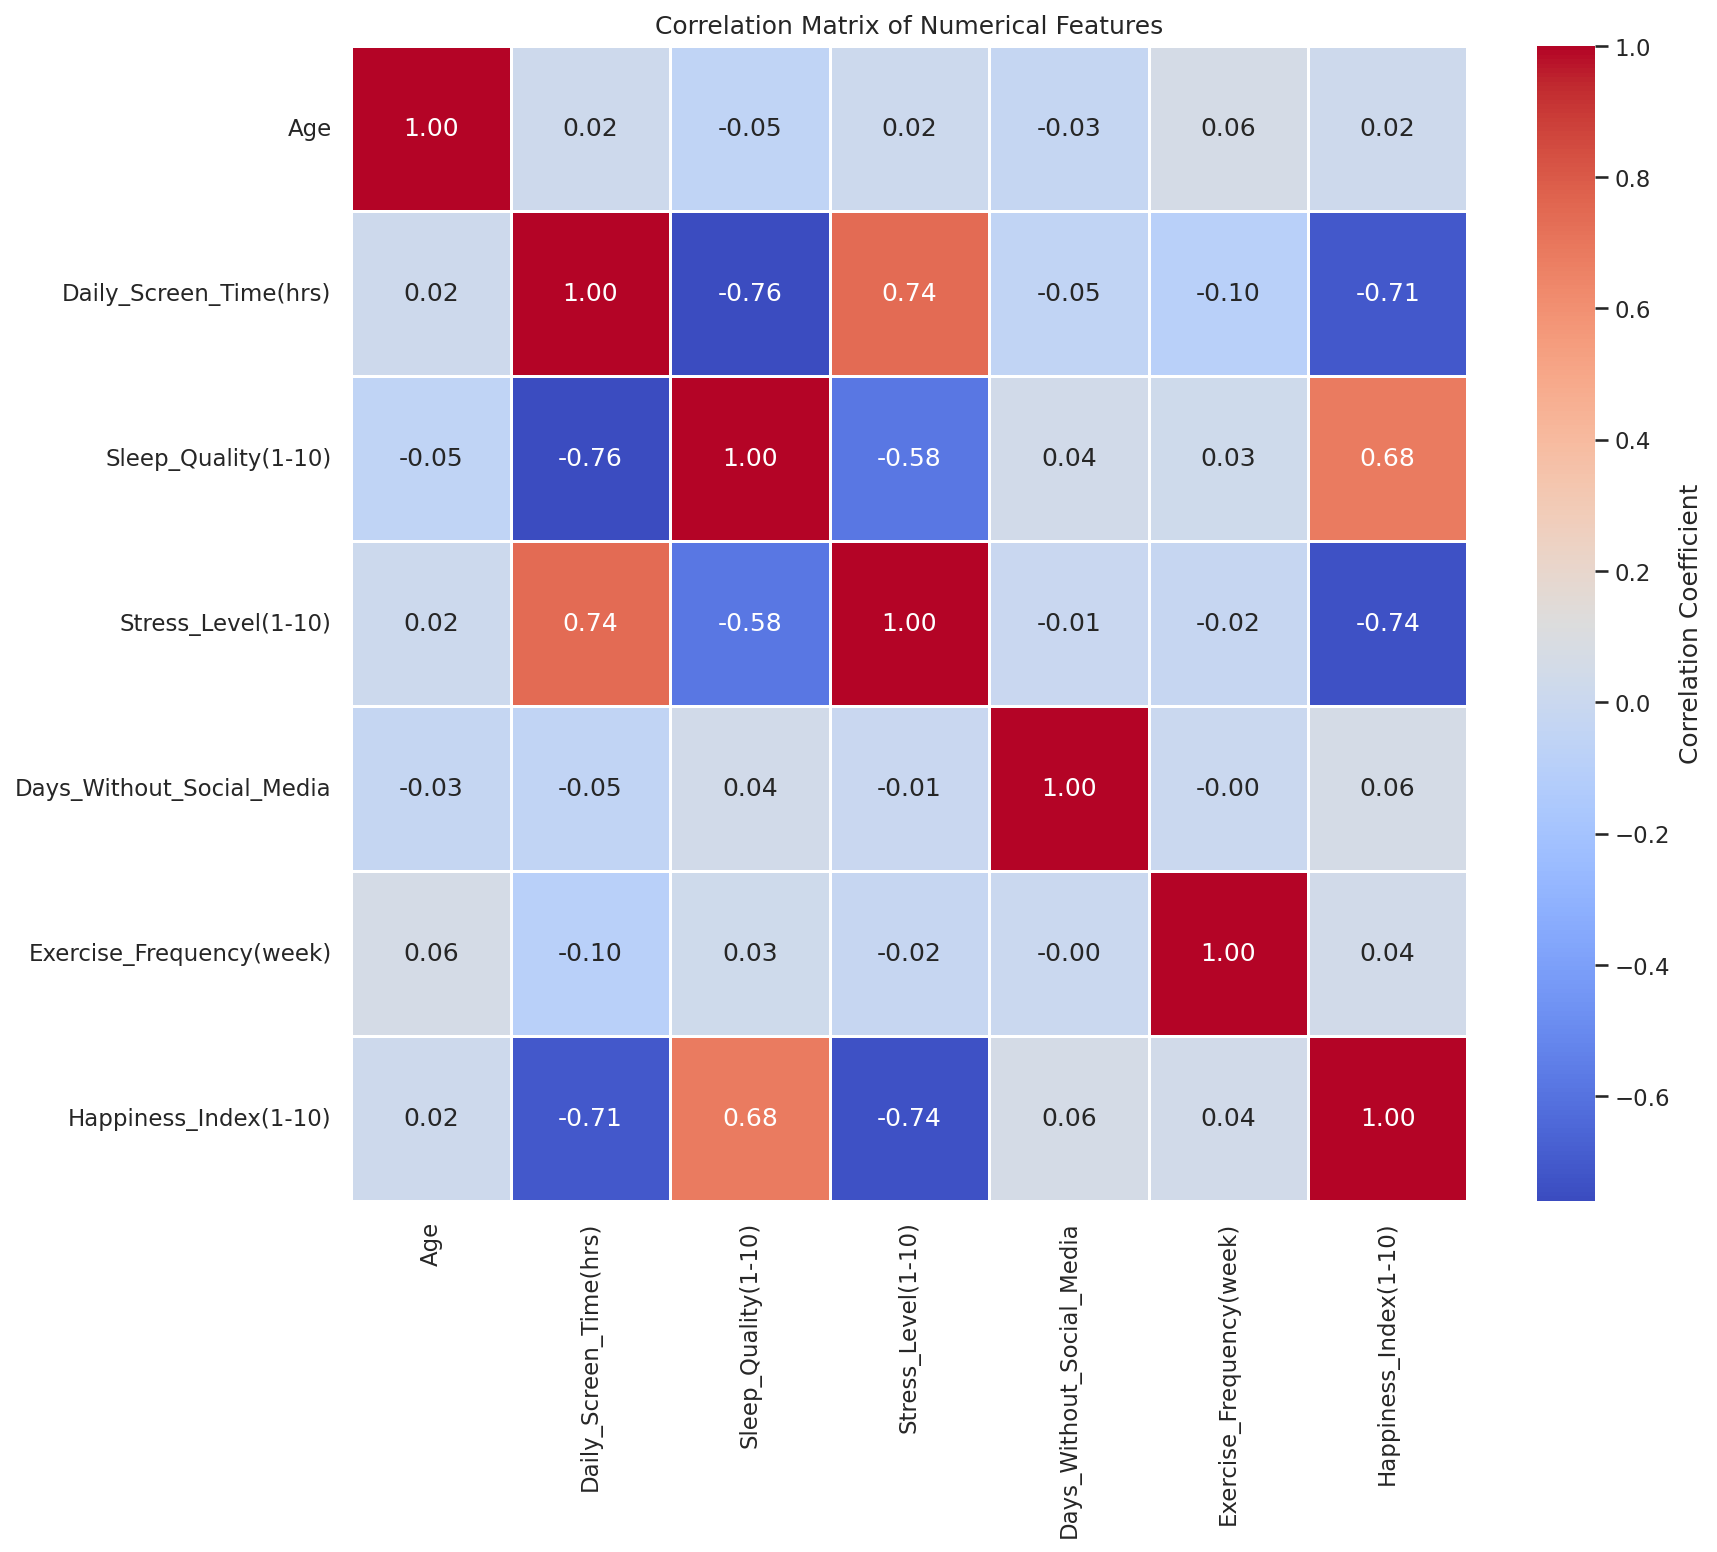

/tmp/ipython-input-275026928.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_happiness.index, y=platform_happiness.values, palette='plasma')


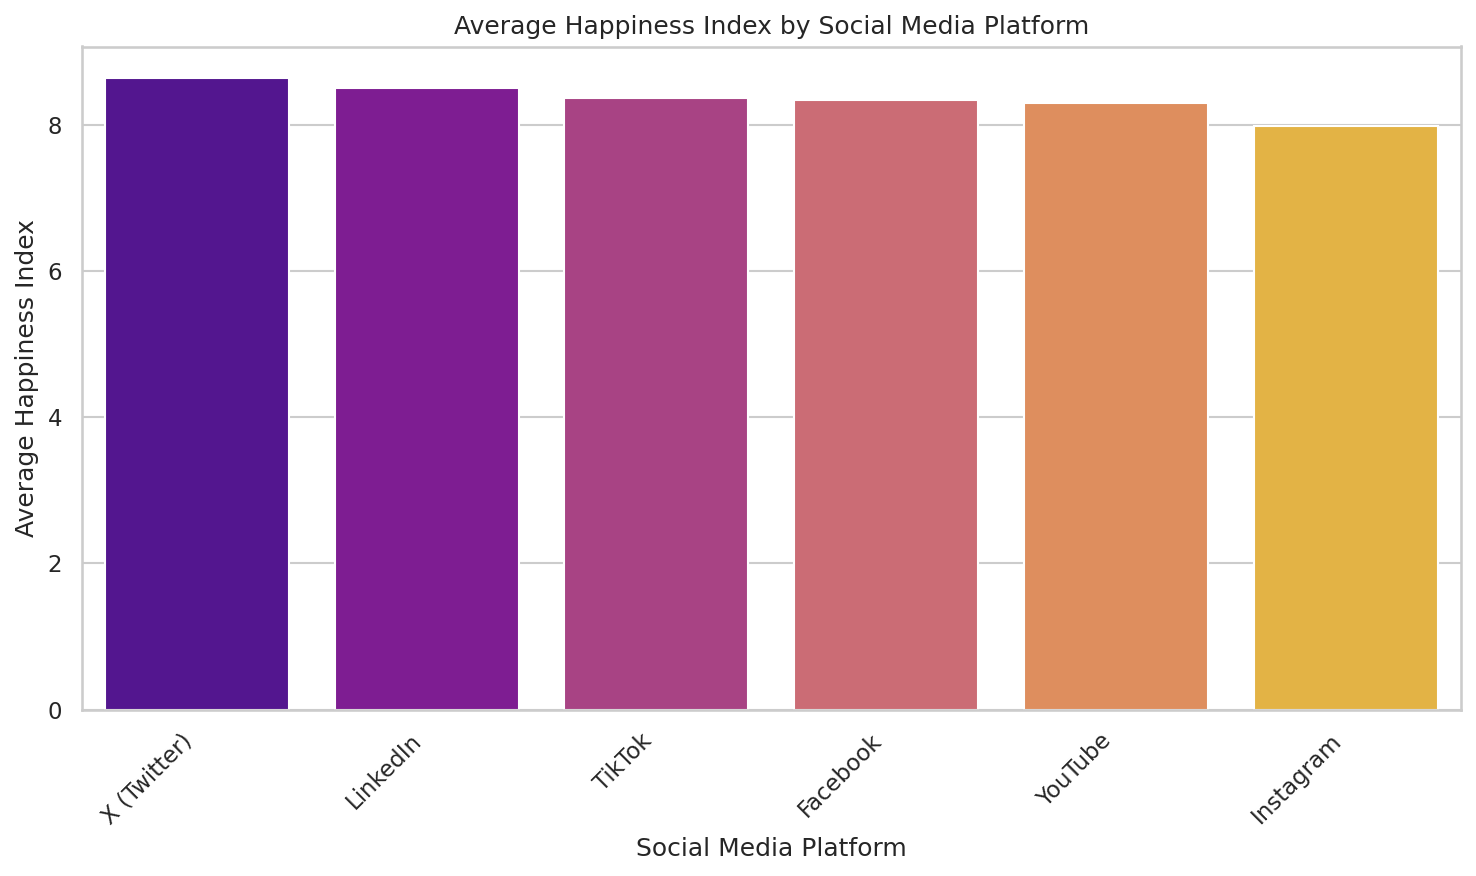


Features to be scaled (Numerical): ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 'Stress_Level(1-10)', 'Days_Without_Social_Media', 'Exercise_Frequency(week)']
Features to be encoded (Categorical): ['Gender', 'Social_Media_Platform']

Shape of original features (X): (500, 8)
Shape of processed features (X_processed): (500, 15)

Processed Data (First 5 rows after cleaning, scaling, and encoding):
        Age  Daily_Screen_Time(hrs)  Sleep_Quality(1-10)  Stress_Level(1-10)  \
0  1.106659               -1.402078             0.455419           -0.400921   
1 -0.300281               -0.248104             0.455419            0.896557   
2 -1.003751                1.078965            -0.198919            0.247818   
3  0.302693                0.098088             0.455419            0.896557   
4  0.101702                0.848171            -1.507595            0.247818   

   Days_Without_Social_Media  Exercise_Frequency(week)  Gender_Female  \
0                  -0.610698       

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Configuration ---
# Set the filename of the uploaded dataset
DATA_FILE = "Mental_Health_and_Social_Media_Balance_Dataset.csv"

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 150 # High resolution plots

print(f"--- 1. Data Loading and Initial Inspection ({DATA_FILE}) ---")
try:
    # Load the dataset
    df = pd.read_csv(DATA_FILE)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{DATA_FILE}' was not found. Please ensure it is in the correct path.")
    exit()

# Initial inspection
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nData types and missing values summary:")
df.info()

print("\nStatistical Summary of Numerical Features:")
# Describe all numerical columns, including the 1-10 scales
print(df.describe())

# --- 2. Data Cleaning and Preparation ---

# Drop the User_ID column as it is an identifier and not useful for modeling
if 'User_ID' in df.columns:
    df = df.drop('User_ID', axis=1)
    print("\n'User_ID' column dropped.")

# Check for and handle missing values (Imputing with the median for numerical features)
# Based on df.info(), assuming some features might have missing values that need filling
print("\nChecking for missing values:")
print(df.isnull().sum())

# Impute numerical missing values with the median of the respective column
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical missing values with the mode (most frequent category)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values addressed (filled with median/mode):")
print(df.isnull().sum().sum())
if df.isnull().sum().sum() == 0:
    print("No missing values remaining.")




# 3.1. Distribution of the Target Variable (Happiness Index)
plt.figure(figsize=(8, 5))
sns.histplot(df['Happiness_Index(1-10)'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Happiness Index')
plt.xlabel('Happiness Index (1-10)')
plt.ylabel('Count')
plt.show()


# 3.2. Relationship between Screen Time and Happiness Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily_Screen_Time(hrs)', y='Happiness_Index(1-10)', data=df, alpha=0.6, color='coral')
plt.title('Daily Screen Time vs. Happiness Index')
plt.xlabel('Daily Screen Time (hrs)')
plt.ylabel('Happiness Index (1-10)')
plt.show()


# 3.3. Stress Level vs. Sleep Quality (Potential intermediary relationship)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level(1-10)', y='Sleep_Quality(1-10)', data=df, palette='viridis')
plt.title('Sleep Quality by Stress Level')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Sleep Quality (1-10)')
plt.show()


# 3.4. Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# 3.5. Social Media Platform vs. Average Happiness Index
platform_happiness = df.groupby('Social_Media_Platform')['Happiness_Index(1-10)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_happiness.index, y=platform_happiness.values, palette='plasma')
plt.title('Average Happiness Index by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Happiness Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- 4. Feature Engineering and Transformation Pipeline ---

# Separate features (X) from the target (y)
# Assuming 'Happiness_Index(1-10)' is the target variable (Mental Health Metric)
X = df.drop('Happiness_Index(1-10)', axis=1)
y = df['Happiness_Index(1-10)']

# Identify column types for preprocessing
# Ordinal scales (1-10) are treated as numerical for standardization
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print("\nFeatures to be scaled (Numerical):", numerical_features)
print("Features to be encoded (Categorical):", categorical_features)

# Create preprocessing pipelines for numerical and categorical data
# 1. Numerical Pipeline: Use StandardScaler to normalize the data (mean=0, std=1)
# This is crucial for algorithms relying on distance measures (like k-NN, SVM, or Neural Networks)
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# 2. Categorical Pipeline: Use OneHotEncoder for nominal features like Gender and Social Media Platform
# This converts categories into numerical columns (e.g., Gender_Female, Gender_Male)
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'  # Keep any other columns if they existed
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

print("\nShape of original features (X):", X.shape)
print("Shape of processed features (X_processed):", X_processed.shape)

# Get the names of the processed columns
feature_names = list(numerical_features)
# Get feature names for one-hot encoded columns
if 'cat' in preprocessor.named_transformers_:
    cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    feature_names.extend(cat_feature_names)

# Convert the processed array back to a DataFrame for review
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

print("\nProcessed Data (First 5 rows after cleaning, scaling, and encoding):")
print(X_processed_df.head())
print("\nFinal Preprocessing Complete.")

# 5.Model Selection & Training

In [26]:
from sklearn.ensemble import RandomForestRegressor

y = df['Happiness_Index(1-10)'].astype(int)

X = df.drop([ 'Happiness_Index(1-10)'], axis=1)


categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



MSE: 0.848362
R² Score: 0.6428851658528373


The target variable Happiness_Index(1–10) is numeric, therefore the correct algorithm type is regression.
I selected an appropriate algorithm: RandomForestRegressor


# 6.Model Evaluation and feature importance

In [28]:
import numpy as np
import pandas as pd # Needed for get_dummies and df operations
from sklearn.model_selection import train_test_split # Needed for splitting data
from sklearn.preprocessing import StandardScaler # Needed for scaling
from sklearn.ensemble import RandomForestRegressor # Needed for the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Needed for evaluation

# Data preparation steps from XxshncQ8E6qi

y = df['Happiness_Index(1-10)'].astype(int)
X = df.drop([ 'Happiness_Index(1-10)'], axis=1)

categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training from XxshncQ8E6qi
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction from XxshncQ8E6qi
y_pred = model.predict(X_test_scaled)

# Evaluation metrics (original content of 77EvkYvKFNK8)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔹 MSE:", mse)
print("🔹 RMSE:", rmse)
print("🔹 MAE:", mae)
print("🔹 R² Score:", r2)

🔹 MSE: 0.848362
🔹 RMSE: 0.9210656871255165
🔹 MAE: 0.737
🔹 R² Score: 0.6428851658528373
